# Zip Upload

We have 36 geojson files each containing a number of reports with 8 columns. One of them will contain reports of 365 days, and the other 35 will be in 24hr format starting from Jan 1, 2024.

In [1]:
import zipfile
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import re
from datetime import datetime

In [2]:
zip_file_path = '/Users/cgty/Library/Mobile Documents/com~apple~CloudDocs/CLASSES/FSU/Spring 2024/ERDOS2024/CLONE/tlhcrimemap/ALL DATA MERGED/24hrs.zip'

We will unpack the contents in the zip file names '24hrs.zip'

In [3]:
# Unzip the contents into the current directory or a specified path
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('.')

print("Unzipped the contents.")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/cgty/Library/Mobile Documents/com~apple~CloudDocs/CLASSES/FSU/Spring 2024/ERDOS2024/CLONE/tlhcrimemap/ALL DATA MERGED/24hrs.zip'

In [ ]:
!ls

We will now add each file into a list.

In [4]:
geojson_dir = './' # This will go into os.listdir() function as an input -- noting the corresponding directory


In [5]:
# Initialize an empty list to store the GeoDataFrames
geojson_gdfs = []

# List all files in the directory and filter for GeoJSON files
geojson_files = [f for f in os.listdir(geojson_dir) if f.endswith('.geojson')]

In [6]:
# The file with index 10 contains all year
# We will move it to the beginning of the list
geojson_files[0],geojson_files[10] = geojson_files[10],geojson_files[0]

We need the sort the dates before we read them into a GeoDataFrame. Cell below shows the current order.

In [7]:
geojson_files

['TOPS_24hrs_20240207.geojson',
 'TOPS_24hrs_20240119.geojson',
 'TOPS_24hrs_20240109.geojson',
 'TOPS_24hrs_20240110.geojson',
 'TOPS_24hrs_20240204.geojson',
 'TOPS_24hrs_20240111.geojson',
 'TOPS_24hrs_20240205.geojson',
 'TOPS_24hrs_20240127.geojson',
 'TOPS_24hrs_20240108.geojson',
 'TOPS_24hrs_20240118.geojson',
 'TOPS_24hrs_20240126.geojson',
 'TOPS_24hrs_20240113.geojson',
 'TOPS_24hrs_20240125.geojson',
 'TOPS_24hrs_20240124.geojson',
 'TOPS_24hrs_20240206.geojson',
 'TOPS_24hrs_20240112.geojson',
 'TOPS_24hrs_20240203.geojson',
 'TOPS_24hrs_20240107.geojson',
 'TOPS_24hrs_20240117.geojson',
 'TOPS_24hrs_20240128.geojson',
 'TOPS_24hrs_20240121.geojson',
 'TOPS_24hrs_20240131.geojson',
 'TOPS_24hrs_20240130.geojson',
 'TOPS_24hrs_20240120.geojson',
 'TOPS_24hrs_20240202.geojson',
 'TOPS_24hrs_20240116.geojson',
 'TOPS_24hrs_20240106.geojson',
 'TOPS_24hrs_20240129.geojson',
 'TOPS_24hrs_20240122.geojson',
 'TOPS_24hrs_20240104.geojson',
 'TOPS_24hrs_20240114.geojson',
 'TOPS_2

In [8]:
# Function to extract the normalized date string from the file name
def extract_date(filename):
    # Handle the 'TOPS_365 Days YYYY Mon DD.geojson' format
    match = re.search(r'TOPS_365 Days (\d{4}) (\w{3}) (\d{2})\.geojson', filename)
    if match:
        year, month, day = match.groups()
        # Convert the three-letter month to a two-digit number
        month = datetime.strptime(month, '%b').month
        return f"{year}{month:02d}{day}"
    
    # Handle the 'TOPS_24hrs_YYYYMMDD.geojson' format
    match = re.search(r'TOPS_24hrs_(\d{8})\.geojson', filename)
    if match:
        # This format is already normalized as 'YYYYMMDD'
        return match.group(1)
    
    # Return a string that will sort last if the format is unrecognized
    return '99999999'



In [9]:
# Now let's sort the list using the custom sort key
geojson_files_sorted = sorted(geojson_files, key=extract_date)

# Verify the result
geojson_files_sorted

['TOPS_24hrs_20240104.geojson',
 'TOPS_24hrs_20240105.geojson',
 'TOPS_24hrs_20240106.geojson',
 'TOPS_24hrs_20240107.geojson',
 'TOPS_24hrs_20240108.geojson',
 'TOPS_24hrs_20240109.geojson',
 'TOPS_24hrs_20240110.geojson',
 'TOPS_24hrs_20240111.geojson',
 'TOPS_24hrs_20240112.geojson',
 'TOPS_24hrs_20240113.geojson',
 'TOPS_24hrs_20240114.geojson',
 'TOPS_24hrs_20240115.geojson',
 'TOPS_24hrs_20240116.geojson',
 'TOPS_24hrs_20240117.geojson',
 'TOPS_24hrs_20240118.geojson',
 'TOPS_24hrs_20240119.geojson',
 'TOPS_24hrs_20240120.geojson',
 'TOPS_24hrs_20240121.geojson',
 'TOPS_24hrs_20240122.geojson',
 'TOPS_24hrs_20240123.geojson',
 'TOPS_24hrs_20240124.geojson',
 'TOPS_24hrs_20240125.geojson',
 'TOPS_24hrs_20240126.geojson',
 'TOPS_24hrs_20240127.geojson',
 'TOPS_24hrs_20240128.geojson',
 'TOPS_24hrs_20240129.geojson',
 'TOPS_24hrs_20240130.geojson',
 'TOPS_24hrs_20240131.geojson',
 'TOPS_24hrs_20240201.geojson',
 'TOPS_24hrs_20240202.geojson',
 'TOPS_24hrs_20240203.geojson',
 'TOPS_2

In [10]:
last_item = geojson_files_sorted.pop()  # Remove the last item and store it
geojson_files_sorted.insert(0, last_item)  # Insert the stored item at the beginning
geojson_files_sorted

['TOPS_24hrs_20240207.geojson',
 'TOPS_24hrs_20240104.geojson',
 'TOPS_24hrs_20240105.geojson',
 'TOPS_24hrs_20240106.geojson',
 'TOPS_24hrs_20240107.geojson',
 'TOPS_24hrs_20240108.geojson',
 'TOPS_24hrs_20240109.geojson',
 'TOPS_24hrs_20240110.geojson',
 'TOPS_24hrs_20240111.geojson',
 'TOPS_24hrs_20240112.geojson',
 'TOPS_24hrs_20240113.geojson',
 'TOPS_24hrs_20240114.geojson',
 'TOPS_24hrs_20240115.geojson',
 'TOPS_24hrs_20240116.geojson',
 'TOPS_24hrs_20240117.geojson',
 'TOPS_24hrs_20240118.geojson',
 'TOPS_24hrs_20240119.geojson',
 'TOPS_24hrs_20240120.geojson',
 'TOPS_24hrs_20240121.geojson',
 'TOPS_24hrs_20240122.geojson',
 'TOPS_24hrs_20240123.geojson',
 'TOPS_24hrs_20240124.geojson',
 'TOPS_24hrs_20240125.geojson',
 'TOPS_24hrs_20240126.geojson',
 'TOPS_24hrs_20240127.geojson',
 'TOPS_24hrs_20240128.geojson',
 'TOPS_24hrs_20240129.geojson',
 'TOPS_24hrs_20240130.geojson',
 'TOPS_24hrs_20240131.geojson',
 'TOPS_24hrs_20240201.geojson',
 'TOPS_24hrs_20240202.geojson',
 'TOPS_2

In [11]:
# Read each GeoJSON file into a GeoDataFrame and append to the list
for filename in geojson_files_sorted:
    file_path = os.path.join(geojson_dir, filename)
    gdf = gpd.read_file(file_path)
    geojson_gdfs.append(gdf)

# Some Analysis

The first item in the list will contain reports from 2023.

In [12]:
reports2023 = geojson_gdfs[0]

In [13]:
reports2023.describe

<bound method NDFrame.describe of     CREATE_TIME_INCIDENT                LOCATION_TEXT BEAT  REPORT_NUMBER  \
0    2024-01-28 10:56:52                     CIRCLE K    3  2024-00016161   
1    2024-01-28 10:47:49  VASCULAR SURGERY ASSOCIATES    4           None   
2    2024-01-28 14:11:53                         None   14           None   
3    2024-01-28 14:15:04                         None    4           None   
4    2024-01-28 14:16:54     LAKES OF SAN MARCOS APTS    7           None   
..                   ...                          ...  ...            ...   
330  2024-01-28 13:47:23         AENON BAPTIST CHURCH  SW1           None   
331  2024-01-28 20:29:36    AMAZON FULFILLMENT CENTER  NE4           None   
332  2024-01-28 20:31:11                         None  SE2           None   
333  2024-01-28 20:36:09                         None  SW3           None   
334  2024-01-29 05:25:42         WAL-MART SUPERCENTER  NW1           None   

    LEGEND2          DISPO_TEXT  OBJECTID

In [14]:
reports2023['CREATE_TIME_INCIDENT']

0     2024-01-28 10:56:52
1     2024-01-28 10:47:49
2     2024-01-28 14:11:53
3     2024-01-28 14:15:04
4     2024-01-28 14:16:54
              ...        
330   2024-01-28 13:47:23
331   2024-01-28 20:29:36
332   2024-01-28 20:31:11
333   2024-01-28 20:36:09
334   2024-01-29 05:25:42
Name: CREATE_TIME_INCIDENT, Length: 335, dtype: datetime64[ns]

There are 365 different dates. Let's find out how many reports there are for each date.

In [15]:
# There is 366 different dates (ignoring the time component)
reports2023['CREATE_TIME_INCIDENT'].dt.date.nunique()

2

In [16]:
date_counts = reports2023['CREATE_TIME_INCIDENT'].dt.date.value_counts()
print(date_counts)

CREATE_TIME_INCIDENT
2024-01-28    253
2024-01-29     82
Name: count, dtype: int64


In [17]:
# Sort the dates
date_counts_sorted = date_counts.sort_index()
print(date_counts_sorted)

CREATE_TIME_INCIDENT
2024-01-28    253
2024-01-29     82
Name: count, dtype: int64


In [18]:
date_counts_sorted

CREATE_TIME_INCIDENT
2024-01-28    253
2024-01-29     82
Name: count, dtype: int64

Below shows number of total incidents for each month.

In [24]:
import pandas as pd

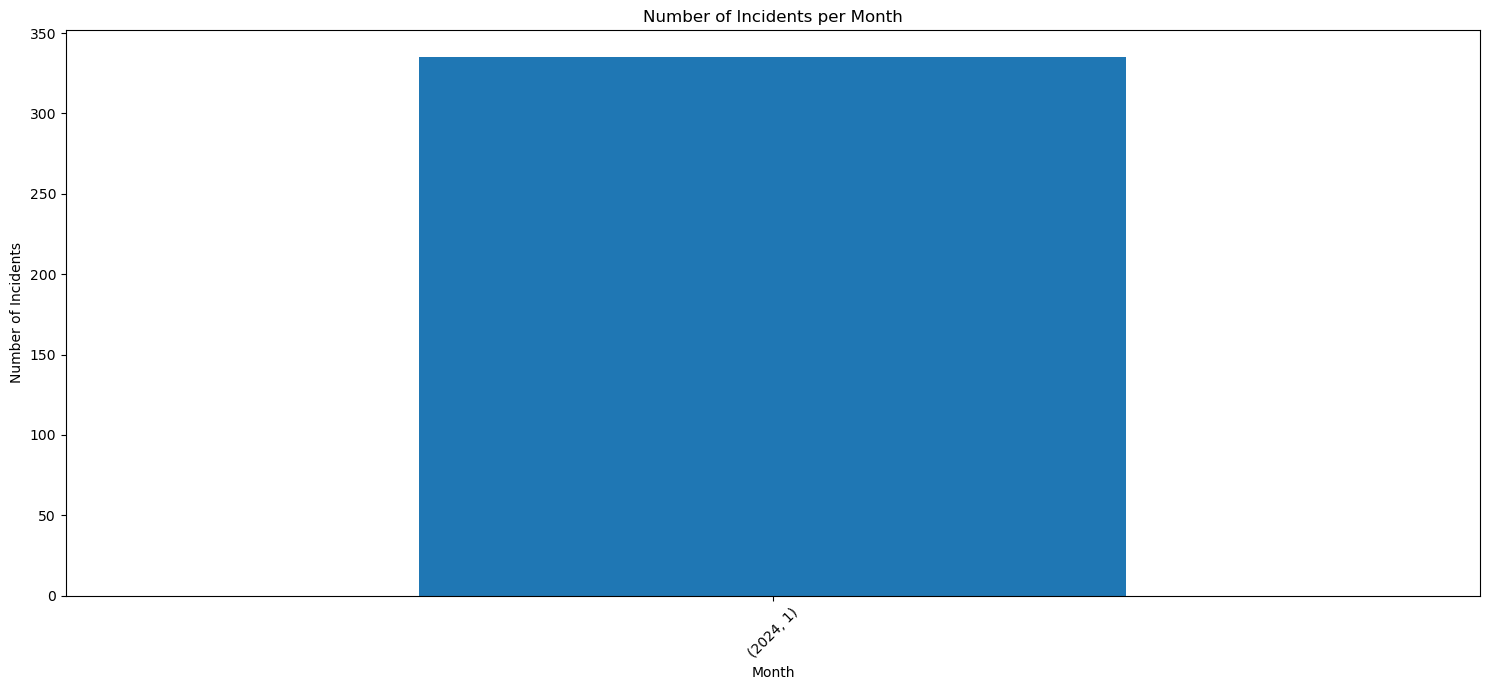

In [25]:
# Convert the index to datetime to ensure proper grouping
date_counts_sorted.index = pd.to_datetime(date_counts_sorted.index)

# Group by year and month, and sum the counts for each month
monthly_counts = date_counts_sorted.groupby([date_counts_sorted.index.year, date_counts_sorted.index.month]).sum()

# Plotting the histogram with monthly bins
monthly_counts.plot(kind='bar', figsize=(15, 7))

plt.title('Number of Incidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)  # Rotate the x-axis labels to show them more clearly
plt.tight_layout()  # Adjust the layout so everything fits without overlapping

plt.show()


Below shows the number of incidents for each day. Note that the last couple of days will belong to 2024.

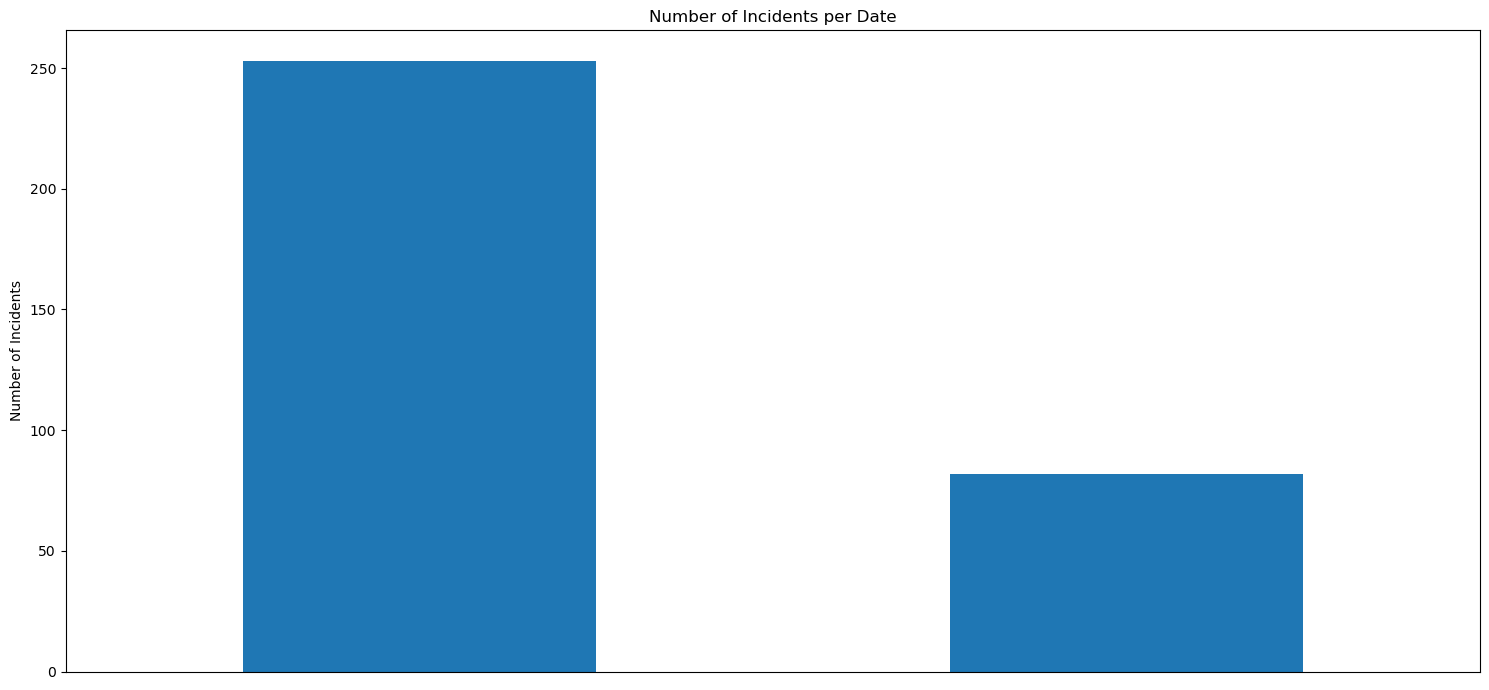

In [26]:
date_counts_sorted.plot(kind='bar', figsize=(15, 7))  # Adjust the figure size as needed

plt.title('Number of Incidents per Date')
plt.xlabel('')  # Remove the x-axis label
plt.ylabel('Number of Incidents')
plt.xticks(ticks=[], labels=[])  # Remove the x-axis tick labels
plt.tight_layout()  # Adjust the layout so everything fits without overlapping

plt.show()

# Merging all the Data

In [27]:
MERGEDALL = gpd.pd.concat(geojson_gdfs,ignore_index = True)

In [28]:
MERGEDALL

,CREATE_TIME_INCIDENT,LOCATION_TEXT,BEAT,REPORT_NUMBER,LEGEND2,DISPO_TEXT,OBJECTID,geometry
0,2024-01-28 10:56:52,CIRCLE K,3,2024-00016161,148,TRESPASS WARNING,1.0,POINT (-9382044.48820 3562589.20120)
1,2024-01-28 10:47:49,VASCULAR SURGERY ASSOCIATES,4,None,505,COMMUNITY POLICING,2.0,POINT (-9376416.11570 3565369.04860)
2,2024-01-28 14:11:53,None,14,None,152,SUSPICIOUS,3.0,POINT (-9385906.23810 3559476.94950)
3,2024-01-28 14:15:04,None,4,None,152,SUSPICIOUS,4.0,POINT (-9377130.47290 3565186.00370)
4,2024-01-28 14:16:54,LAKES OF SAN MARCOS APTS,7,None,152,SUSPICIOUS,5.0,POINT (-9380962.25230 3551569.21930)
...,...,...,...,...,...,...,...,...
11978,2024-01-27 14:59:57,FUN STATION,3,2024-00015758,120,DISORDERLY CONDUCT,360.0,POINT (-9383662.89990 3565483.82800)
11979,2024-01-26 20:38:55,None,SW3,None,159,MISC SERVICE CALL,361.0,POINT (-9384641.75220 3552163.55010)
11980,2024-01-27 03:42:00,None,SW1,None,149,WANTED PERSON,362.0,POINT (-9392422.87220 3561803.76750)
11981,2024-01-27 04:27:55,None,SW3,None,133,LOUD NOISE / MUSIC,363.0,POINT (-9383553.84240 3552199.54170)


# An issue

The rows 161193 through 161197 has NaT for crime time incident column. This is because the crime time incident column of the last geojson file got messed up.

In [50]:
geojson_gdfs[i].columns

Index(['CREATE_TIME_INCIDENT', 'LOCATION_TEXT', 'BEAT', 'REPORT_NUMBER',
       'LEGEND2', 'DISPO_TEXT', 'OBJECTID', 'geometry'],
      dtype='object')

In [51]:
#This one missed create time incident
#Time incident information is accidentally written in the LOCATION Text
for i in range(len(geojson_gdfs)):
    number= len(geojson_gdfs[i].columns)
    
    if number != 8:
        print(i)



22


In [55]:
geojson_gdfs[22]

,geometry
